In [1]:
# import libraries
import pandas as pd
import numpy as np
import tabulate
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# import dataframes from csv
companies = pd.read_csv("sp500_companies.csv")
index = pd.read_csv("sp500_index.csv", parse_dates=True)
stocks = pd.read_csv("sp500_stocks.csv")



In [3]:
# clean data

companies = companies.drop(columns=["Longname", "Shortname", "Longbusinesssummary", "City", "State", "Country", "Fulltimeemployees"])
pd.to_datetime(index["Date"])
stocks = stocks.dropna()
stocks['Date'] = pd.to_datetime(stocks['Date'], format='mixed')
stocks = stocks[stocks['Date'].dt.date > datetime.date(2024,1,1)]



Text(0.5, 1.0, 'Sectors')

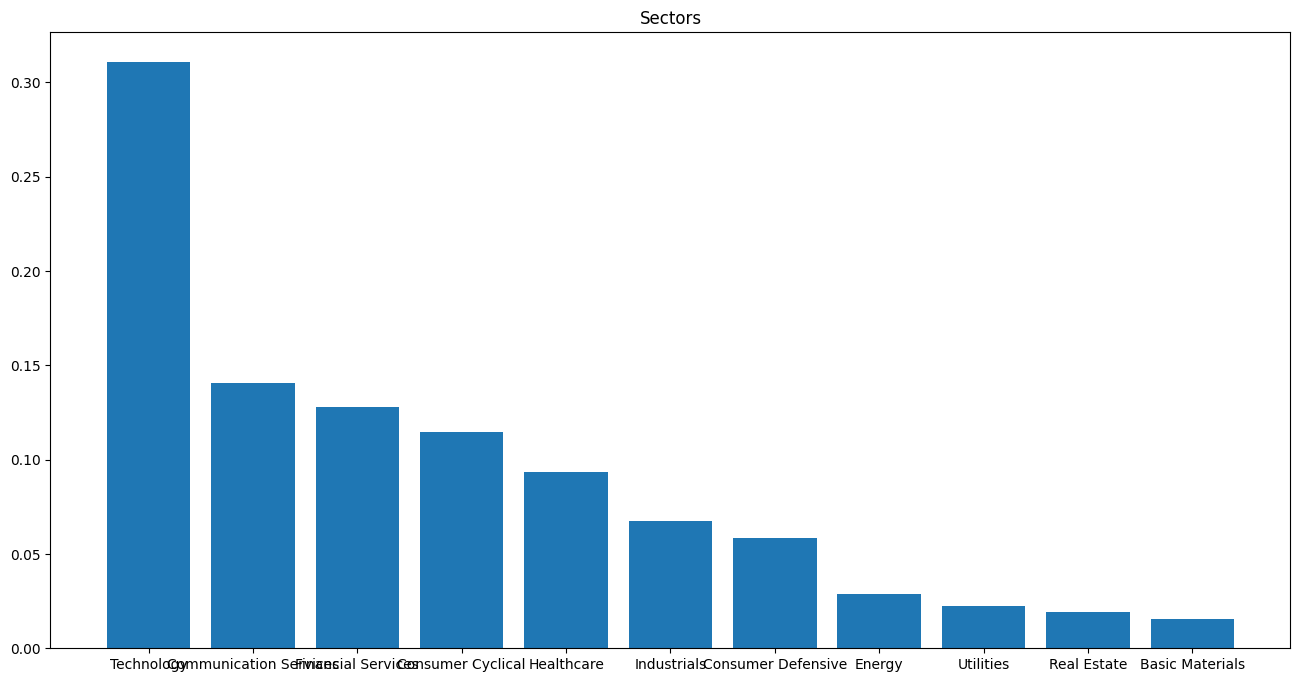

In [4]:
# Group Sector Data

sectors = companies.groupby("Sector").agg({"Weight": "sum"})
sectors = sectors.reset_index()
sectors = sectors.sort_values("Weight", ascending = False)

plt.figure(figsize=(16,8))
plt.bar(sectors["Sector"], sectors["Weight"])
plt.title("Sectors")

Text(0.5, 1.0, 'Industry')

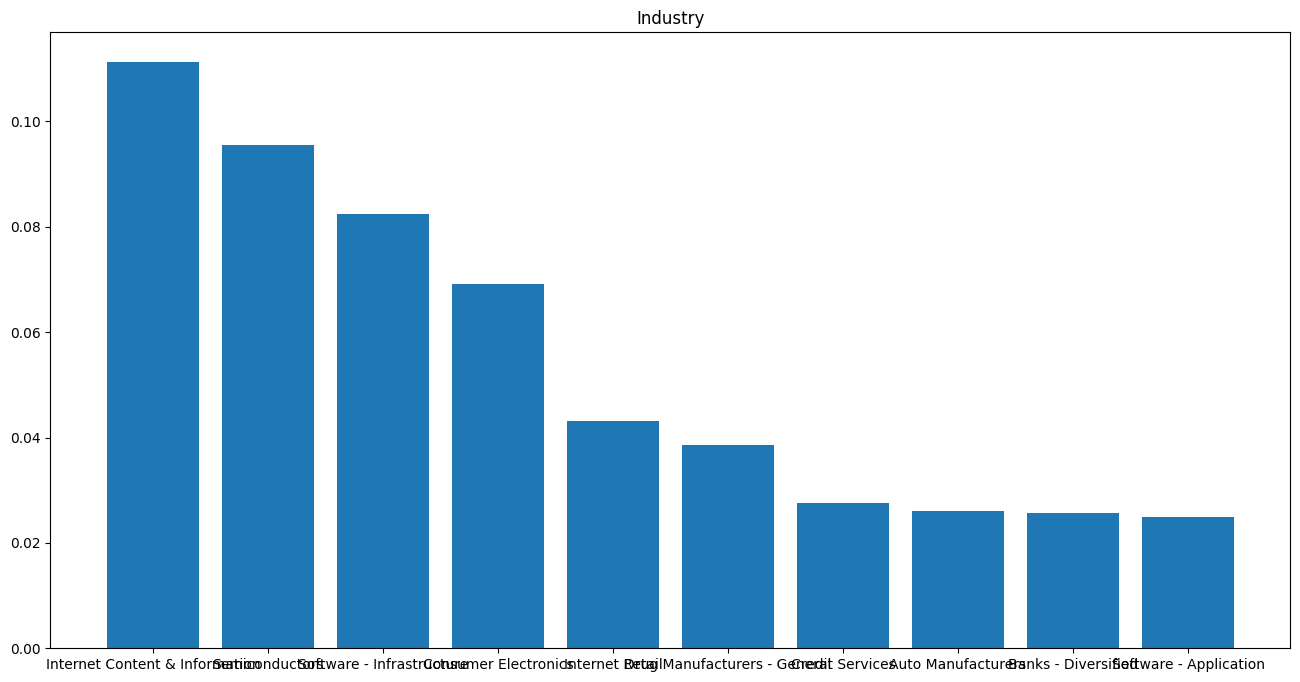

In [5]:
# group industry data

industries = companies.groupby("Industry").agg({"Weight": "sum"})
industries = industries.reset_index()
industries = industries.sort_values("Weight", ascending = False)
industries = industries.head(10)

plt.figure(figsize=(16,8))
plt.bar(industries["Industry"], industries["Weight"])
plt.title("Industry")

<Axes: ylabel='Weight'>

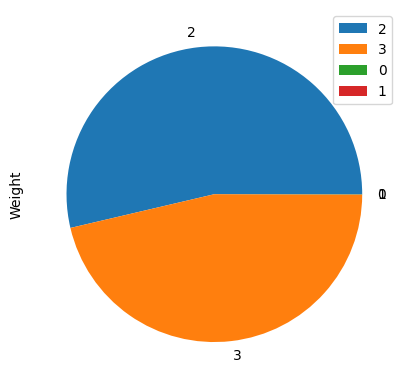

In [6]:
exchange = companies.groupby("Exchange").agg({"Weight": "sum"})
exchange = exchange.reset_index()
exchange = exchange.sort_values("Weight", ascending = False)

exchange.plot(kind="pie", y="Weight")

Text(0.5, 1.0, 'S & P 500 Growth over time')

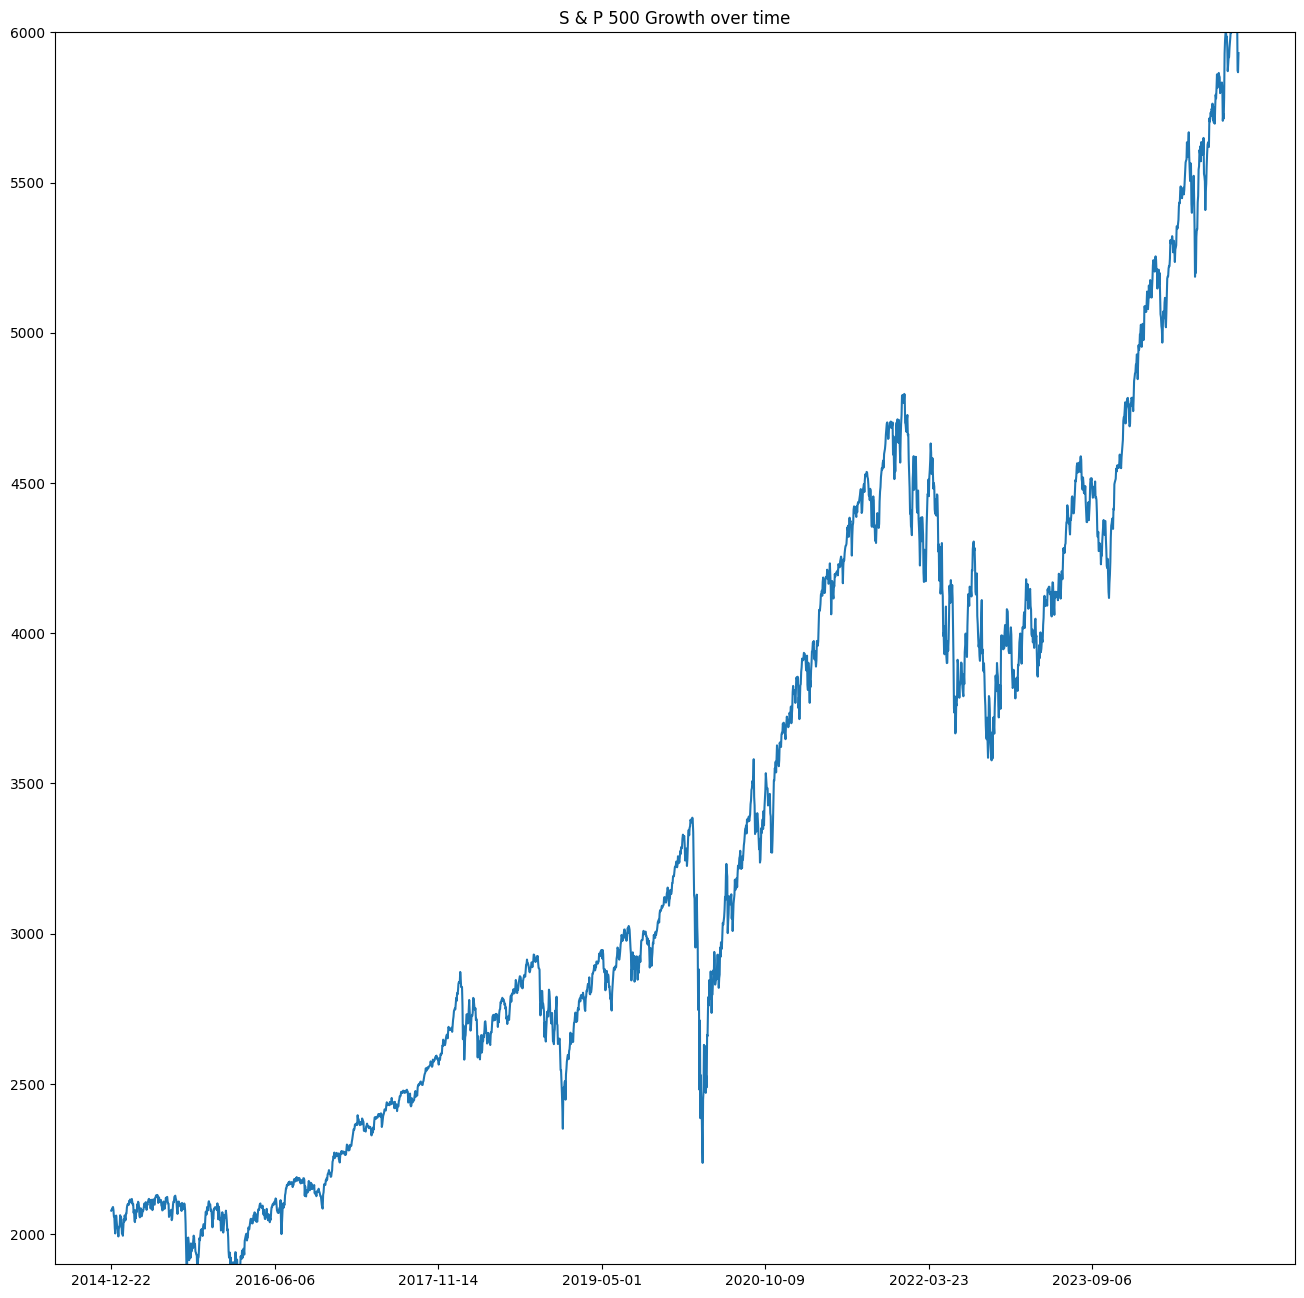

In [7]:
plt.figure(figsize=(16,16))
plt.plot(index["Date"], index["S&P500"])
plt.ylim([1900, 6000])
plt.xticks(index["Date"][::365])
plt.title("S & P 500 Growth over time")

In [8]:
# #get the total volume of each company since 1/1/2024
volume = stocks.groupby(["Symbol"], as_index=False)['Volume'].sum()

<Axes: xlabel='Symbol'>

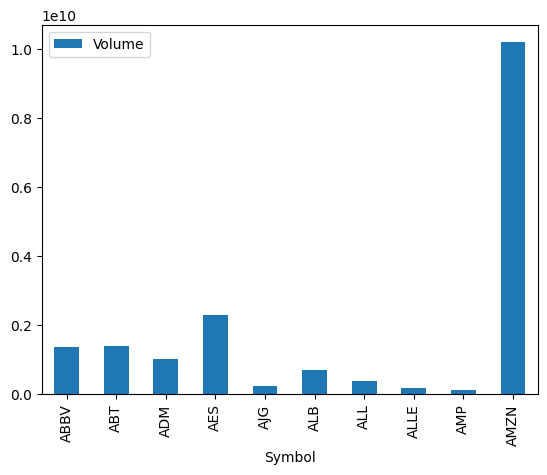

In [9]:
# Top stocks by volume since 1/1/2024

topvolume = volume.head(10)
topvolume = topvolume.set_index('Symbol')
topvolume.plot(kind="bar", y="Volume")

<Axes: xlabel='Symbol'>

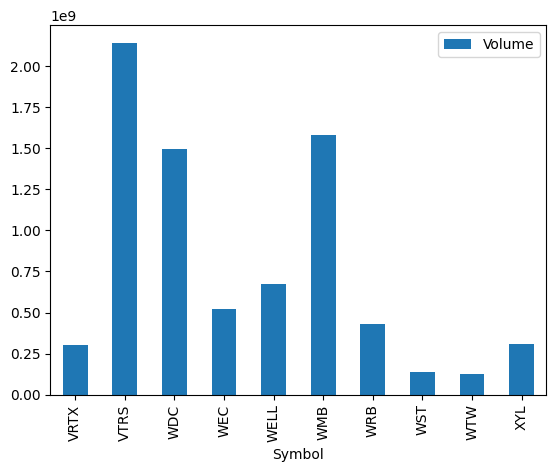

In [10]:
# Bottom stocks by volume since 1/1/2024

lowvolume = volume.tail(10).reset_index()
lowvolume = lowvolume.set_index('Symbol')
lowvolume.plot(kind="bar", y="Volume")